In [3]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [4]:
train_ds="/Users/jayasakthibalajig/Sakthi/CropManagement/train/"
test_ds="/Users/jayasakthibalajig/Sakthi/CropManagement/test/"

import os
cwd = os.getcwd()
print(cwd)

/Users/jayasakthibalajig/Sakthi/CropManagement


In [6]:
import os


def change():
    os.chdir("/Users/jayasakthibalajig/Sakthi/CropManagement/train")
    import subprocess
    subprocess.call("Run.sh")

# change()

root_path = r"/Users/jayasakthibalajig/Sakthi/CropManagement/train/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

class_dis = []
for name in class_names:
    class_path = os.path.join(root_path, name)
    if os.path.isdir(class_path):
        class_dis.append(len(os.listdir(class_path)))
    else:
        print(f"Warning: Directory '{class_path}' does not exist.")

print(f"Total Number of Classes: {n_classes}")
print(f"Class Names: {class_names}")
for name, count in zip(class_names, class_dis):
    print(f"{name}: {count}")


Total Number of Classes: 6
Class Names: ['Cotton', 'Run.sh', 'maize', 'rice', 'sugarcane', 'wheat']
Cotton: 160
Run.sh: 160
maize: 160
rice: 160
sugarcane: 160


In [7]:
import plotly.express as px

In [8]:
os.listdir("/Users/jayasakthibalajig/Sakthi/CropManagement/train")

['sugarcane', 'rice', 'Cotton', 'Run.sh', 'wheat', 'maize']

In [9]:
os.listdir("/Users/jayasakthibalajig/Sakthi/CropManagement/test")

['sugarcane', '.DS_Store', 'rIce', 'cotton', 'wheat', 'maize']

In [10]:
batch_size=32
img_size=224

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 800 images belonging to 5 classes.
Found 192 images belonging to 5 classes.


In [12]:
test_generator[0][0].shape

(32, 224, 224, 3)

In [13]:
img= train_generator[0]
print(img)

(array([[[[6.8137181e-01, 7.6372474e-01, 7.8333259e-01],
         [6.8117428e-01, 7.6352721e-01, 7.8313506e-01],
         [6.8509585e-01, 7.6744878e-01, 7.8139436e-01],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[6.8487364e-01, 7.6722658e-01, 7.8683442e-01],
         [6.8657058e-01, 7.6892352e-01, 7.8853136e-01],
         [6.9059217e-01, 7.7294511e-01, 7.8470987e-01],
         ...,
         [0.0000000e+00, 2.1588258e-03, 0.0000000e+00],
         [0.0000000e+00, 2.1588258e-03, 0.0000000e+00],
         [0.0000000e+00, 2.1588258e-03, 0.0000000e+00]],

        [[6.8535697e-01, 7.6770991e-01, 7.8731775e-01],
         [6.8693781e-01, 7.6929075e-01, 7.8589505e-01],
         [6.9120389e-01, 7.7355689e-01, 7.8532159e-01],
         ...,
         [0.0000000e+00, 3.9215689e-03, 0.0000000e+00],
         [0.0000000e+00, 3.9215689e-03, 0.0000000e+00],
 

In [14]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [15]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 5)


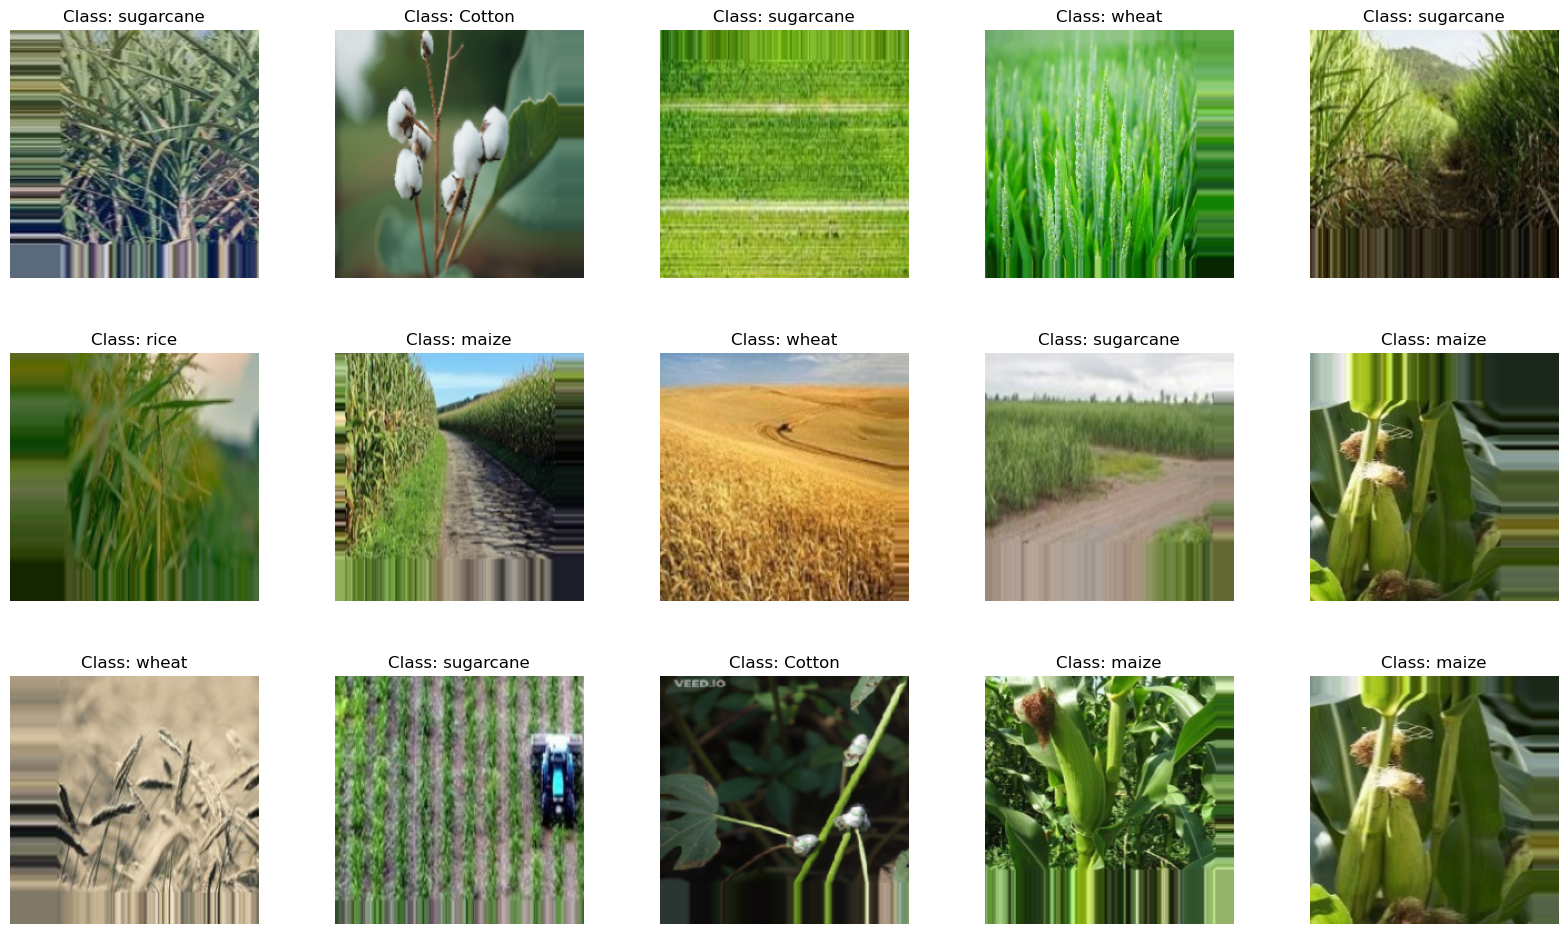

In [16]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [17]:
print(len(train_generator))
print(len(test_ds))

25
52


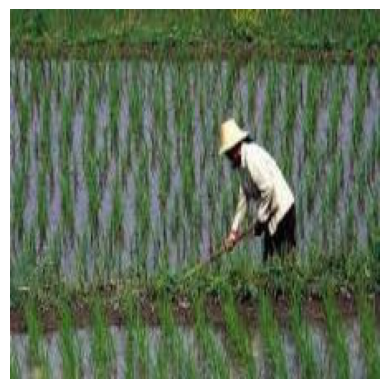

In [18]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/Users/jayasakthibalajig/Sakthi/CropManagement/train/rice/rice002a.jpeg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
from keras.layers import MaxPool2D

In [20]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

In [21]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(5, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes =5

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

/var/folders/6g/4xs5vtms423996692rqhqww80000gn/T/ipykernel_37358/1794533968.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,233,989 (12.34 MB)

 Trainable params: 3,212,101 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [22]:
model = mobilenet((224, 224, 3))

/var/folders/6g/4xs5vtms423996692rqhqww80000gn/T/ipykernel_37358/1794533968.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


In [23]:
# Print the model summary

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,233,989 (12.34 MB)

 Trainable params: 3,212,101 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [26]:
history =model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20


/Users/jayasakthibalajig/Sakthi/Anaconda/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3577 - loss: 1.8046 - val_accuracy: 0.4323 - val_loss: 1.8627
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7747 - loss: 0.6471 - val_accuracy: 0.4792 - val_loss: 1.9836
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8960 - loss: 0.3229 - val_accuracy: 0.5833 - val_loss: 1.6802
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9203 - loss: 0.2175 - val_accuracy: 0.6094 - val_loss: 1.3738
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9530 - loss: 0.1461 - val_accuracy: 0.6042 - val_loss: 1.3408
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9669 - loss: 0.1145 - val_accuracy: 0.6823 - val_loss: 0.8395
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9606 - loss: 0.1112 - val_accuracy: 0.7865 - val_loss: 0.5957
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1014s 42s/step - accuracy: 0.9904 - loss: 0.0609 - val_accuracy: 0.7917 - val_loss: 0.5306


In [29]:
n_categories = len(os.listdir("/Users/jayasakthibalajig/Sakthi/CropManagement/test"))# number of categories print(n_categories)

In [30]:
n_categories

6

In [31]:
results =pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
15,0.99875,0.013863,0.854167,0.338050
16,0.99375,0.019406,0.838542,0.375852
17,0.99500,0.020769,0.890625,0.260028
18,0.99750,0.011259,0.911458,0.242521
19,1.00000,0.006834,0.906250,0.262320


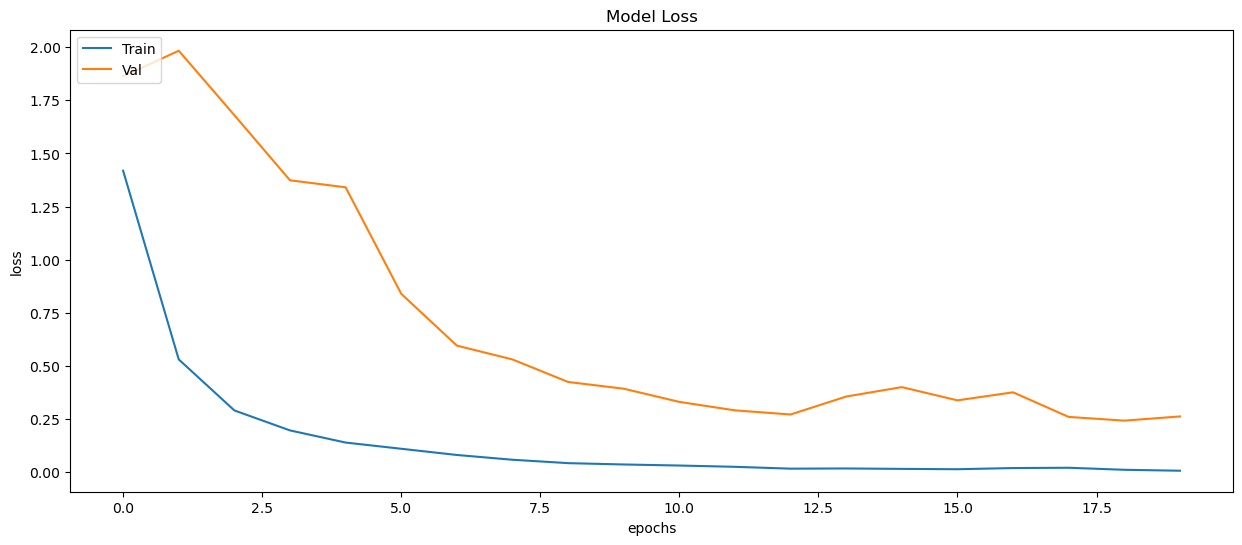

In [32]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

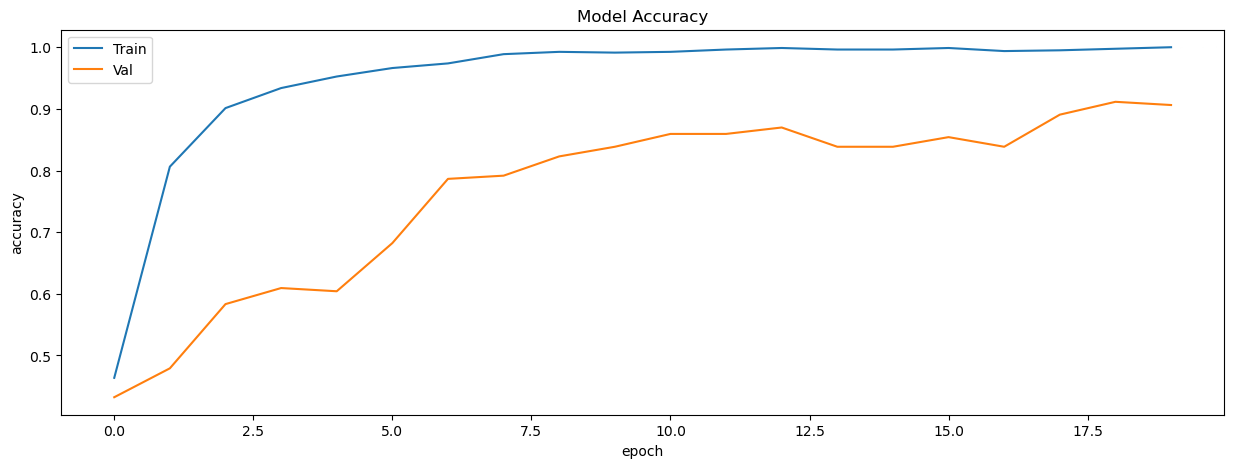

In [33]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [34]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step


In [35]:
results =model.evaluate(test_generator)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.9256 - loss: 0.2180


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.89      0.84      0.86        38
           2       0.85      0.92      0.88        37
           3       0.82      0.85      0.84        33
           4       0.98      0.91      0.94        45

    accuracy                           0.91       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.91      0.91      0.91       192



In [37]:
model_json = model.to_json()
with open("/Users/jayasakthibalajig/Sakthi/CropManagement/model_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [93]:
model.save_weights("/Users/jayasakthibalajig/Sakthi/CropManagement/model_weights.weights.h5")

In [94]:
model.save("/Users/jayasakthibalajig/Sakthi/CropManagement/model.h5")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


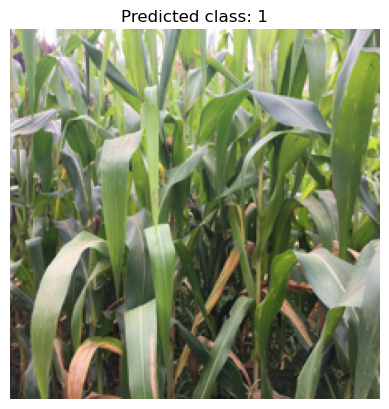

In [54]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = "/Users/jayasakthibalajig/Sakthi/CropManagement/test/maize/"
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [39]:
count_rice=0
count_maize=0
count_sugarcane=0
count_cotton=0
count_wheat=0

for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    if(labels[predicted_class]=="sugarcane"):
        count_sugarcane+=1
    elif labels[predicted_class] == "maize":
        count_maize+=1
    elif labels[predicted_class] == "rice":
        count_rice+=1
    elif labels[predicted_class] == "Cotton":
        count_cotton+=1
    elif labels[predicted_class] == "wheat":
        count_wheat+=1
    print('Class probability:', class_probability)

Predicted class for 1.jpg : maize
Class probability: 0.9470978
Predicted class for 2.jpg : maize
Class probability: 0.9238925
Predicted class for 3.jpg : maize
Class probability: 0.9995663
Predicted class for 4.jpg : maize
Class probability: 0.99912816
Predicted class for 5.jpg : maize
Class probability: 0.99999964
Predicted class for 6.jpg : maize
Class probability: 0.99987125
Predicted class for 7.jpg : maize
Class probability: 0.98664945
Predicted class for 8.jpg : maize
Class probability: 0.9906488
Predicted class for 9.jpg : maize
Class probability: 0.9987373
Predicted class for 10.jpg : maize
Class probability: 0.91537774
Predicted class for 11.jpg : maize
Class probability: 0.9998458
Predicted class for 12.jpg : maize
Class probability: 0.54146945
Predicted class for 13.jpg : sugarcane
Class probability: 0.6989562
Predicted class for 14.jpg : maize
Class probability: 0.6997209
Predicted class for 15.jpg : maize
Class probability: 0.92208964
Predicted class for 16.jpg : maize
Cla

In [40]:
print("Rice : ",count_rice)
print("Maize : ",count_maize)
print("Cotton : ",count_cotton)
print("SugarCane : ",count_sugarcane)
print("Wheat : ",count_wheat)

Rice :  1
Maize :  34
Cotton :  0
SugarCane :  3
Wheat :  0
